In [1]:
import numpy as np
import seaborn
import scipy.stats as scs

import inspect
from sklearn.gaussian_process import GaussianProcess, GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
seaborn.set_style('whitegrid')

## Noise-free case

In [3]:
def f(x):
    return np.cos(x)

In [4]:
def plot_it (x, f, X, y_pred, sigma, dy=None):
    plt.plot(x, f(x), 'r:', label=u'true function')
    if dy is not None:
        plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=6, label=u'Observations/Constraints')
    else:
        plt.plot(X, y, 'r.', markersize=6, label=u'Observations/Constraints')
    plt.plot(x, y_pred, 'b-', label=u'Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred + scs.norm.ppf(0.025) * sigma,
                            (y_pred + scs.norm.ppf(0.975) * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.legend(loc='best')

In [5]:
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T # add point 12
y = np.array(f(X)).ravel()

x = np.atleast_2d(np.linspace(0, 10, 1000)).T # increase the range

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gpr.fit(X, y)
y_pred_1, sigma_1 = gpr.predict(x, return_std=True)

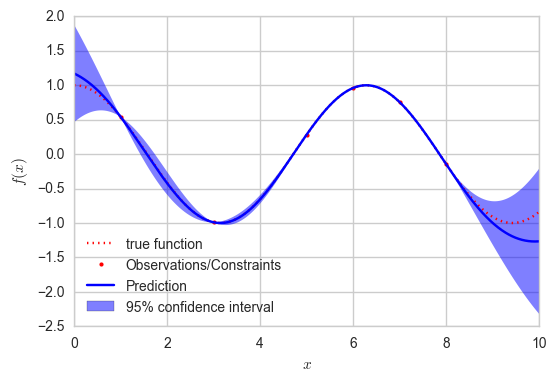

In [6]:
plot_it(x, f, X, y_pred_1, sigma_1, dy=None)

$$
f(x) = \begin{cases} 5 - x^2, x < 2 \\ 13x - 1, x \ge 2 \end{cases}.
$$

In [7]:
f = lambda x: [5 - x[i] ** 2 if x[i] < 2 else 13 * x[i] - 1 for i in range(len(x))]

In [8]:
X = np.atleast_2d([-7, -3, -1, 0, 2, 4, 6]).T
y = np.array(f(X)).ravel()

x = np.atleast_2d(np.arange(-10, 10, 0.1)).T

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 5e1))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gpr.fit(X, y)
y_pred, sigma = gpr.predict(x, return_std=True)

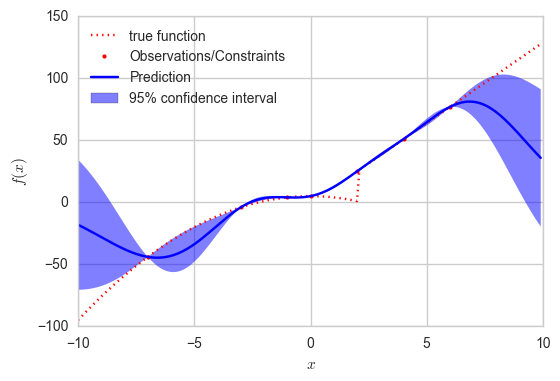

In [9]:
plot_it(x, f, X, y_pred, sigma, dy = None)

## Noisy case

In [10]:
def f(x):
    return x * np.sin(x)

In [11]:
#X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T # add point 12
X = np.linspace(0.1, 9.9, 12)
X = np.atleast_2d(X).T
y = np.array(f(X)).ravel()

x = np.atleast_2d(np.linspace(0, 10, 1000)).T # increase the range

np.random.seed(1)

dy = 0.5 + .1 * np.random.random(y.shape)
noise = np.random.normal(0, dy) # generating noise
y = y + noise # adding noise to the points

gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)
gp.fit(X, y)
y_pred_noise, sigma_noise = gp.predict(x, return_std=True)

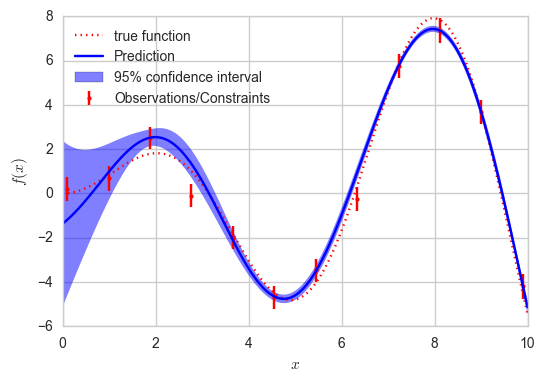

In [12]:
plot_it(x, f, X, y_pred_noise, sigma_noise, dy = dy)